# Cargando lo que ya teníamos

In [1]:
import pandas as pd
import csv

In [2]:
df = pd.read_csv('corpus.csv')

## Distribución de palabras en los mensajes

Para entender un poco más el problema veremos la distribución de las palabras. Además esto nos va a ayudar a evitar problemas en un futuro.

In [3]:
from collections import Counter
from itertools import chain

In [4]:
distribution_words = Counter(chain.from_iterable(df.message.map(lambda x: x.split())))

In [5]:
df_distribution = pd.DataFrame(data={'word': list(distribution_words.keys()), 'counter': list(distribution_words.values())})

Es decir el vocabulario total es alrededor de:

In [6]:
df_distribution.count()

counter    101709
word       101709
dtype: int64

Por lo que las palabras menos vistas son

In [7]:
df_distribution.sort_values('counter').head(20)

,counter,word
0,1,dormidasooo
60728,1,ajkaka
60727,1,ADICTO
60724,1,comunicacion
60723,1,estorbar
60714,1,zarpado?
60713,1,PTT-20171018-WA0012.opus
60712,1,qqqq?
60711,1,línea!?
60710,1,(x3


Pero las más vistas son:

In [8]:
df_distribution.sort_values('counter', ascending=False).head(20)

,counter,word
60356,24711,que
60007,24340,de
85641,19959,a
83913,18941,la
37194,17267,el
72658,14858,no
33179,13413,y
37373,12578,en
13021,11407,<Archivo
98714,11407,omitido>


In [9]:
df_distribution.describe()

,counter
count,101709.000000
mean,9.733337
std,206.484416
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,24711.000000


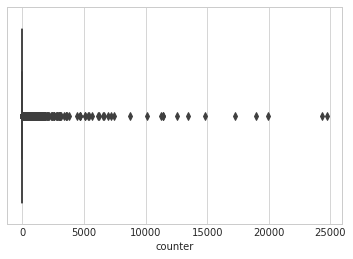

In [11]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.boxplot(x=df_distribution["counter"])

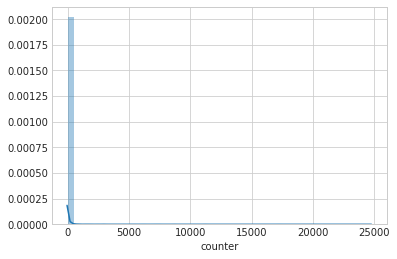

In [14]:
sns.distplot(df_distribution["counter"])

Luego al ver algunas caracteristicas de la distribución podemos los siguientes problemas:
- __25,50 y 75 percentiles muy bajos__: la mayoría de las palabras tienen una sóla aparición.
- __maximo - minimo muy alto__: esto quiere decir que hay gran diferencia entre los conteos de las palabras
- __desviación estándar muy alto__: el esparcimiento de los datos es muy grande. Las palabras están muy distribuidas.
- __histograma y gráfico de caja imposibles de leer__: toda la distribución se concentra en palabras de 1 sola aparicín

In [15]:
sum(df_distribution.counter == 1) / df_distribution.count()

counter    0.648645
word       0.648645
dtype: float64

Vemos que hay alrededor de un 65% de palabras que aparecen una sóla vez... esto puede causar que la **vectorización no sea tan representativa como queremos...**

Problemas que vimos:
   - Al ser mensajes instantaneos, por lo general las personas no se preocupan con la ortográfia ni la forma de escribir.
   - Muchos tipos de mismas palabras, por ejemplo jajaja = jaja, dale = daleee.
   - _Archivo omitido_ como media en un principio no es útil.
   - Algunas puntaciones son inútiles para el problema (no ayudan en nada). Ejemplo amen = amén.
   - Los emoticones son necesarios para este problema?

## Conclusión

Después de discutir un rato decidimos tomar estás decisiones para mejorar la distribución:
   - "Normalizar palabras más vistas" (jajajajajaa --> ja)
   - Tratar las puntuaciones como palabras ("?", "!", "...") o directamente removerlas (quiero' --> quiero)
   - Pasar a minuscula toda palabra
   - Eliminar palabra que no aparezca más de 10 veces (soluciona errores de ortografía, links, etc)
   - Remover acentos
   - Pasar digito a la palabra NUM
   - Remover characteres repetidos, ejemplo: vaaaaamos por vamos.
   - __Hacer Stemm serviría? FIJARSE __